## Moving beyond the `for` loop ##

So far we have relied on the for loop to iterate through `arrays` and `lists` in order to compute some value (find the max or mean). `for` loops are great very powerful, but can quickly become computationally very slow.

This notebooks will go through some examples of how you can implement the use of arrays and matricies to solve problems much faster than using a `for` loop.

1. __Broadcasting basics__
2. __Finding the nearest value problem__   

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Broadcasting ###

From the [docs](https://numpy.org/doc/stable/user/basics.broadcasting.html): 
> The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. 

![](https://numpy.org/doc/stable/_images/broadcasting_1.png)

__Multiplication__

In [3]:
my_data = np.array([11,44,55,66,77,88,99,110])

print("\n Multiplication: my_data * 2 ")
print(my_data * 2)

print("\n Division: my_data / 2 ")
print(my_data / 2)

print("\n Addition: my_data + 2 ")
print(my_data + 2)

print("\n Floor Division: my_data // 2 ")
print(my_data // 2)

print("\n Exponents: my_data ** 2 ")
print(my_data ** 2)


 Multiplication: my_data * 2 
[ 22  88 110 132 154 176 198 220]

 Division: my_data / 2 
[ 5.5 22.  27.5 33.  38.5 44.  49.5 55. ]

 Addition: my_data + 2 
[ 13  46  57  68  79  90 101 112]

 Floor Division: my_data // 2 
[ 5 22 27 33 38 44 49 55]

 Exponents: my_data ** 2 
[  121  1936  3025  4356  5929  7744  9801 12100]


__Example: Manipulating Images__

Fundsmentally, an image is an array of data, where each pixel is represented by a 3 (or 4 as we will see) values:
- __R__: Red value
- __G__: Green value
- __B__: Blue value
- __a__: alpha value (transparency) --> This is a special case for `.pngs`

__What to do:__
1. Load an image and convert it into a numpy array. 
2. Manipulate the RBGa values at each pixel
3. Display the results

__We can use the [`Pillow` aka PIL](https://pillow.readthedocs.io/en/stable/) library to load an image from the Santa Cruz Wharf__

PNG
(4032, 3024)
RGBA


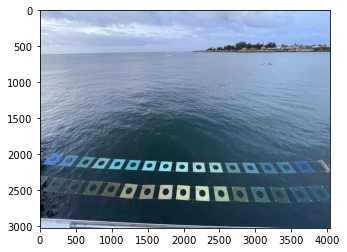

In [62]:
from PIL import Image
image = Image.open('./wharf_color.png')
print(image.format)
print(image.size)
print(image.mode) # This tells use what the pixel values are
plt.imshow(image)

__Now, convert the image into a numpy array__

In [63]:
data = np.asarray(image) #That was easy!
print(data.shape)

(3024, 4032, 4)


__Make the Image Transparent__

We can can broadcast floor division, `//`, to the data. 

Numpy is smart and will look to see if the array we are broadcasting matches the shape of any of the dimensions of the data array and if it does, it will apply that broadcast only in that dimnsion.


Since we don't want to effect __RGB__ and only __a__, it should look like `[1,1,1,2]`

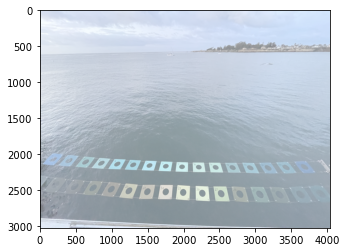

In [8]:
data_tran = data // np.array([1,1,1,2])
plt.imshow(data_tran)

__How about we only plot the red channel__  

We can mask the other channels by multiplying them by zero. 

Again, `numpy` is smart and can figure out which dimension to broadcast to.

In [9]:
data_red = data * np.array([1,0,0,1])
plt.imshow(data_red)

__Convert the image to Greyscale__

Use the formula:  
`gray = 0.2989 * r + 0.5870 * g + 0.1140 * b`

We can broadcast the scaling and then use `np.sum` along the 3rd dimension to get the summed up value.

We have to divide by 255 (__bonus:__ how many bits is that?) to get the value between 0 and 1 for grayscale

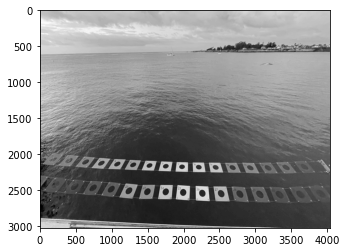

In [11]:
data_grey = data * np.array([0.2989,0.5870,0.1140,0]) / 255

grey_scale = np.sum(data_grey[:,:,:],axis=2)

plt.imshow(grey_scale, cmap='gray')

## 2. Photoshop is Matrix Manipulation ##

The fundementals of image manipulation are done using linear algebra. 

- Suppose you wanted to rotate an image, we can transpose it around the first and second axes.

- Want to create a mirror object? reverse the x dim using `[::-1]`

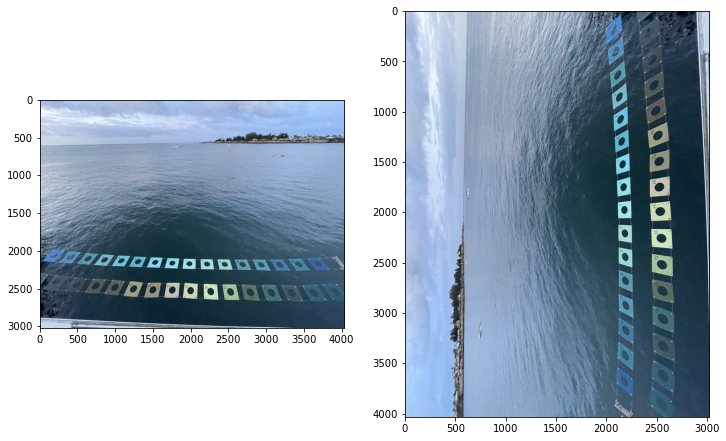

In [26]:
fig = plt.figure()
fig.set_size_inches(12,10)
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(data)

# Remember Transpose from Last Week?
ax2.imshow(np.transpose(data,axes=(1,0,2)))

plt.show()

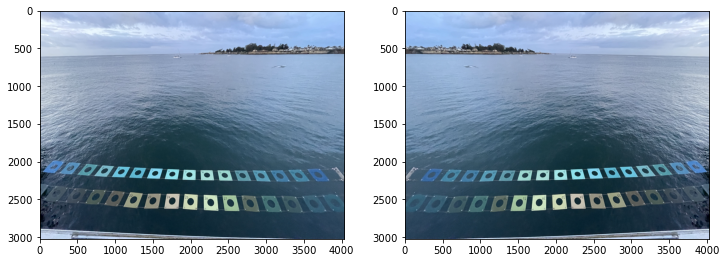

In [31]:
fig = plt.figure()
fig.set_size_inches(12,10)
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(data)

# Remember Transpose from Last Week?
ax2.imshow(data[:,::-1,:])

plt.show()


__ Wonder 

In [67]:
from PIL import Image
image = Image.open('./george.JPG')
print(image.format)
print(image.size)
print(image.mode) # This tells use what the pixel values are
data = np.asarray(image)
data = np.transpose(data,axes=(1,0,2))

JPEG
(4032, 3024)
RGB


In [68]:
minI_r = 50
maxI_r = 230

minI_g = 50
maxI_g = 225

minI_b = 80
maxI_b = 210

minO= 0
maxO= 255

scaling = [((maxO-minO)/(maxI_r - minI_r)) + minO, ((maxO-minO)/(maxI_g - minI_g)) + minO, ((maxO-minO)/(maxI_b - minI_b)) + minO]

t = data - np.array([minI_r,minI_g,minI_b])
t = t * np.array(scaling)
t = t.astype(int)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


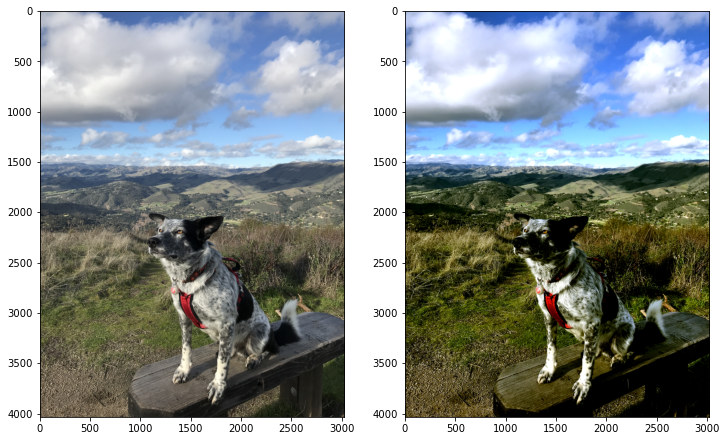

In [69]:
fig = plt.figure()
fig.set_size_inches(12,10)
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(data)

# Remember Transpose from Last Week?
ax2.imshow(t)

plt.show()

Make your own Photo Filters:

__Sepia__: [Sepia-tone](https://en.wikipedia.org/wiki/Sepia_(color))

In [84]:
sepia_r = np.sum(data * np.array([0.393,0.769,0.189]), axis=2)
sepia_g = np.sum(data * np.array([0.349,0.686,0.168]), axis=2)
sepia_b = np.sum(data * np.array([0.272,0.534,0.131]), axis=2)
sepia = np.dstack([sepia_r,sepia_g,sepia_b]).astype(int) #Depth Stack the three different arrays

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


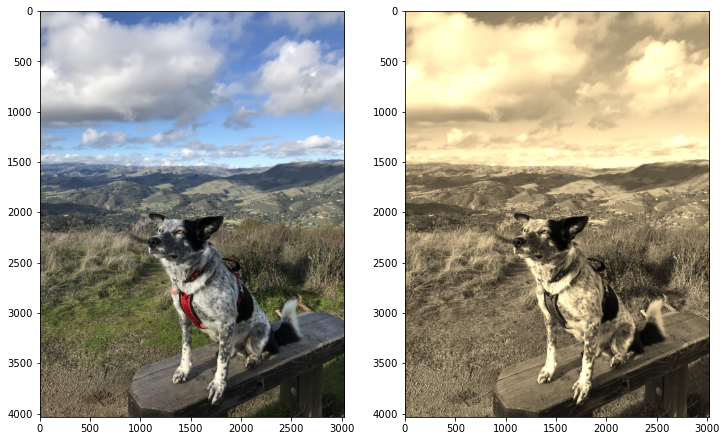

In [85]:
fig = plt.figure()
fig.set_size_inches(12,10)

ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side

ax1.imshow(data)
ax2.imshow(sepia)

plt.show()

## 3. Moving beyond the For Loop ##

- Suppose you want to find at how many hours, the data plateaus, which we can define as not increasing more an .01 over 2 hours.

In [40]:
my_data = np.array([0.1, 0.25, 0.75, 1, 1.2, 1.3,1.5,1.6,1.65,1.66,1.66,1.66,1.67,1.678,1.678,1.678,1.679,1.68])
hours = np.arange(0,len(my_data))*2

You could plot the data up and draw a line acorss the data and then eyeball where it basically stops moving. But if you had to do this for 1000 experiments, it would be very time consuming and probably not easily reproducable.

(0.0, 1.75)

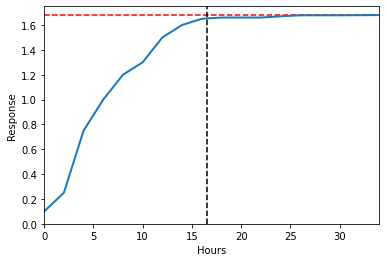

In [44]:
fig,ax=plt.subplots()

ax.set_ylabel('Response')
ax.set_xlabel('Hours')
ax.hlines(y=1.678,xmin=0,xmax=34,color='r',ls='dashed')
ax.vlines(x=16.5,ymin=0,ymax=2,color='k',ls='dashed')
ax.plot(hours,my_data,lw=2)

ax.set_xlim(0, hours.max())
ax.set_ylim(0, 1.75)

Using a `for` loop, we can loop through the data and compare the difference of each value with the value to the right. If the absolute value less than or equal to the threshold, where know that this is where the data plateaus

In [53]:
thresh = 0.01
for i in range(len(my_data)-1):
    if np.abs(my_data[i] - my_data[i+1]) <= thresh:
        break
print(f"Data plateaus at {hours[i]} hours")

Data plateaus at 18 hours


Now we can use a special function in Jupyter to profile the code, ie measure how long it takes to execute.

THis is done adding the [magic function](https://ipython.readthedocs.io/en/stable/interactive/magics.html): `%%timeit` to the beginning of the jupyter cell. By default timeit will execute the cell 10000 times an measure how long it takes to run.

In [69]:
%%timeit
thresh = 0.01
for i in range(len(my_data)-1):
    if np.abs(my_data[i] - my_data[i+1]) <= thresh:
        break


12.4 µs ± 271 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Now, lets solve the same problem, but without a loop.

__First, we can use `np.diff()`__
- `np.diff()` returns an array of the difference of adjacent numbers. Pay attention to the length of the output, it will be one smaller than the input.

In [70]:
a = np.array([10,20,40,55,-10,22])
print(np.diff(a))

[ 10  20  15 -65  32]


__Second, we can use `np.where()` to find out where the difference is smaller or equal to the threshold__
- `np.where()` returns an array of indicies where a condition is True


In [71]:
a = np.array([10,20,-40,-55,10,-22])
print(np.where(a < 0))

(array([2, 3, 5]),)


__Putting it all together__

In [72]:
thresh = 0.01
dif = np.diff(my_data)
i = np.where(dif <= thresh)[0][0] # This returns the first value
print(f"Data plateaus at {hours[i]} hours")

Data plateaus at 18 hours


Now lets profile the doing it this way

In [73]:
%%timeit
thresh = 0.01
dif = np.diff(my_data)
i = np.where(dif <= thresh)[0][0] # This returns the first value

4.94 µs ± 279 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


__It is almost 3x faster without the loop!__